# K-means clustering

In [1]:
import sys
sys.path.append("..")

# inline for docked plots, none for undocked plots (best for the report)
# %matplotlib
%matplotlib inline  

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import time
from knn import knn_algorithm
from utils import vis_utils
from utils import data_utils

In [2]:
data = pd.read_csv("../data.csv", header=None)
data = pd.DataFrame.to_numpy(data)
data = np.delete(data, 0, 1)
np.random.shuffle(data)

### 3.1.1 
Try to improve the performance on 2-person (disjunct) dataset (you can select any 2 person data for this) using K-means clustering. Perform K- means clustering of each cipher individually for the training set, in order to represent the training data as a number of cluster centroids. Now perform the training of the k-NN using the centroids of these clusters. You can try with different cluster sizes and see the resulting performance.




In [3]:
student1 = 5
student2 = 16

# Training data from one student
d_train = data[data[:,0] == student1]
l_train = d_train[:,1]
d_train = np.delete(d_train, [0,1], 1)

# Test data from another student
d_test = data[data[:,0] == student2]
l_test = d_test[:,1]
d_test = np.delete(d_test, [0,1], 1)

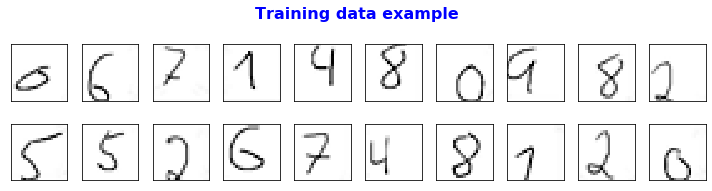

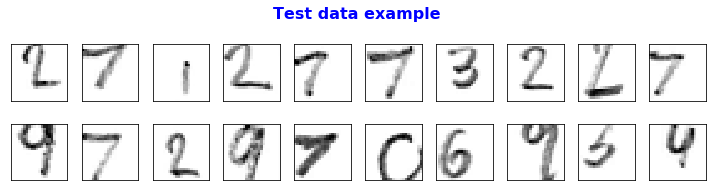

In [17]:
vis_utils.visualize_generic(d_train[50:70], 2, 10, "Training data example")
vis_utils.visualize_generic(d_test[50:70], 2, 10, "Test data example")

In [4]:
# Initializing KMeans without smart improvements, just as in the slides
# k_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25, 35, 50]
k_clusters = [15]
k_nn = [1]

acc = []
t_knn = []
t_kmeans = []

for k in k_clusters:
    print('k =', k, end='\t')
    # kmeans = KMeans(n_clusters=k, init='random', n_init=100, algorithm='full')
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, algorithm='full')

    centroids = np.ndarray((0,d_train.shape[1]))
    c_labels = np.ndarray((0,1))
    t_start = time.time()
    for cipher in range(10):

        kmeans.fit(d_train[l_train == cipher])

        centroids = np.append(centroids, kmeans.cluster_centers_, axis=0)
        l = [cipher]*k
        c_labels = np.append(c_labels, l)

    t_elapsed = time.time() - t_start
    t_kmeans.append(t_elapsed)
    print("t_kmeans =", "{:.3f}".format(t_elapsed), end='\t')

    a,_,_,c,t = knn_algorithm.knnParamSearch(centroids, c_labels, d_test, l_test, k_nn, ['euclidean'])
    print('acc =', "{:.3f}".format(a[0]), '\tt_knn =', "{:.3f}".format(t[0]))
    acc.append(a[0])
    t_knn.append(t[0])
    if k == 15:
        conf = c


a_bl,_,_,_,t_bl = knn_algorithm.knnParamSearch(d_train, l_train, d_test, l_test, k_nn, ['euclidean'])
print("No clustering:\t\t\t\tacc =", "{:.3f}".format(a_bl[0]), "\tt_knn =", "{:.3f}".format(t_bl[0]))

a_bl = a_bl*len(k_clusters)
t_bl = t_bl*len(k_clusters)

k = 15	t_kmeans = 1.979	acc = 0.410 	t_knn = 0.175
No clustering:				acc = 0.322 	t_knn = 0.392


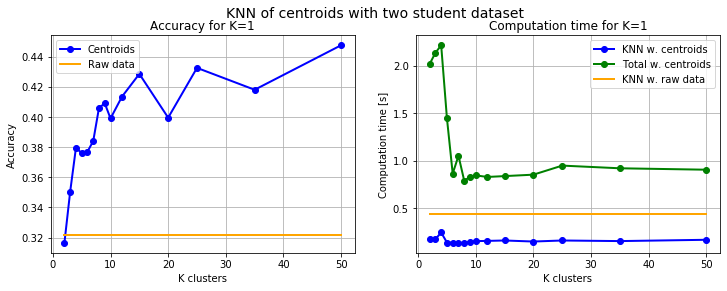

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))

t_total = np.add(t_knn, t_kmeans)

axs[0].plot(k_clusters, acc, linewidth=2.0, marker=".", markersize=12, color='blue', label="Centroids")
axs[0].plot(k_clusters, a_bl, linewidth=2.0, marker=".", markersize=0, color='orange', label="Raw data")
axs[0].set(title="Accuracy for K=1", xlabel="K clusters", ylabel="Accuracy")
axs[0].legend()
axs[0].grid(True)

axs[1].plot(k_clusters, t_knn, linewidth=2.0, marker=".", markersize=12, color='blue', label="KNN w. centroids")
axs[1].plot(k_clusters, t_total, linewidth=2.0, marker=".", markersize=12, color='green', label="Total w. centroids")
axs[1].plot(k_clusters, t_bl, linewidth=2.0, marker=".", markersize=0, color='orange', label="KNN w. raw data")
axs[1].set(title="Computation time for K=1", xlabel="K clusters", ylabel="Computation time [s]")
axs[1].legend()
axs[1].grid(True)

fig.suptitle("KNN of centroids with two student dataset",fontsize=14)
plt.show()

### 3.1.2 
Compare your KNN performance based on the raw training data and based on the cluster centroids of the training data. During the comparison you should also consider the run times of the algorithm. As the generation of clusters is based on random starting points cross-validation should be performed.

- Plotting a confusion matrix is recomended


In [7]:
data2 = data[data[:,0] == student1]
data2 = np.append(data2, data[data[:,0] == student2], axis=0)

cross_val_cnt = 10

k_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25, 35, 50]
k_nn = [1]

acc_kmeans = []
t_kmeans = []
t_knn = []
t_total = []
conf_mat_kmeans = []

print("Running cross validation with clustering:")
for j, k in enumerate(k_clusters):
    print('k =', k, end='\t')
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, algorithm='full')

    t_kmeans_tmp = []
    acc_kmeans_tmp = []
    t_knn_tmp = []
    conf_mat_kmeans.append(np.zeros((10,10)))

    for val_i in range(cross_val_cnt):
        d_train, l_train, d_test, l_test = data_utils.split_data_crossValidation(data2, val_i, cross_val_cnt)
        
        centroids = np.ndarray((0,d_train.shape[1]))
        c_labels = np.ndarray((0,1))
        t_start = time.time()

        for cipher in range(10):

            kmeans.fit(d_train[l_train == cipher])

            centroids = np.append(centroids, kmeans.cluster_centers_, axis=0)
            l = [cipher]*k
            c_labels = np.append(c_labels, l)

        t_elapsed = time.time() - t_start
        t_kmeans_tmp.append(t_elapsed)
                
        a, _, _, conf_mat, t = knn_algorithm.knnParamSearch(centroids, c_labels, d_test, l_test, k_nn, ['euclidean'])
        acc_kmeans_tmp.append(a[0])
        t_knn_tmp.append(t[0])
        conf_mat_kmeans[j] = np.add(conf_mat_kmeans[j], conf_mat[0])
    
    acc_kmeans.append(np.average(acc_kmeans_tmp))
    t_kmeans.append(np.average(t_kmeans_tmp))
    t_knn.append(np.average(t_knn_tmp))

    print("t_kmeans avg =", "{:.3f}".format(t_kmeans[j]), end='\t')
    print('acc avg =', "{:.3f}".format(acc_kmeans[j]), '\tt_knn avg =', "{:.3f}".format(t_knn[j]))

t_total = np.add(t_knn, t_kmeans)


acc_raw = []
t_raw = []
conf_mat_raw = np.zeros((10,10))

print("Running cross validation with raw data:")
for i in range(cross_val_cnt):
    print("i =", i, end='\t')
    d_train, l_train, d_test, l_test = data_utils.split_data_crossValidation(data2, i, cross_val_cnt)
    
    a, _, _, conf_mat, t = knn_algorithm.knnParamSearch(d_train, l_train, d_test, l_test, k_nn, ['euclidean'])
    acc_raw.append(a[0])
    t_raw.append(t[0])
    conf_mat_raw = np.add(conf_mat_raw, conf_mat[0])

    print('acc =', "{:.3f}".format(a[0]), '\tt_knn =', "{:.3f}".format(t[0]))

acc_raw_avg = [np.average(acc_raw)] * len(k_clusters)
t_raw_avg = [np.average(t_raw)] * len(k_clusters)

Running cross validation with clustering:
k = 2	t_kmeans avg = 1.064	acc avg = 0.674 	t_knn avg = 0.032
k = 3	t_kmeans avg = 1.443	acc avg = 0.704 	t_knn avg = 0.034
k = 4	t_kmeans avg = 1.678	acc avg = 0.745 	t_knn avg = 0.034
k = 5	t_kmeans avg = 1.637	acc avg = 0.754 	t_knn avg = 0.033
k = 6	t_kmeans avg = 1.420	acc avg = 0.771 	t_knn avg = 0.028
k = 7	t_kmeans avg = 1.854	acc avg = 0.779 	t_knn avg = 0.032
k = 8	t_kmeans avg = 1.470	acc avg = 0.787 	t_knn avg = 0.030
k = 9	t_kmeans avg = 1.484	acc avg = 0.801 	t_knn avg = 0.034
k = 10	t_kmeans avg = 1.488	acc avg = 0.804 	t_knn avg = 0.030
k = 12	t_kmeans avg = 1.482	acc avg = 0.807 	t_knn avg = 0.029
k = 15	t_kmeans avg = 1.564	acc avg = 0.814 	t_knn avg = 0.031
k = 20	t_kmeans avg = 1.601	acc avg = 0.821 	t_knn avg = 0.031
k = 25	t_kmeans avg = 1.644	acc avg = 0.840 	t_knn avg = 0.038
k = 35	t_kmeans avg = 1.833	acc avg = 0.840 	t_knn avg = 0.036
k = 50	t_kmeans avg = 2.001	acc avg = 0.849 	t_knn avg = 0.037
Running cross validat

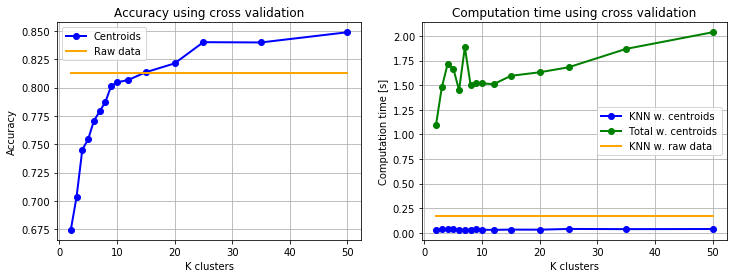

In [8]:
# Ploting graph of accuracy
fig, axs = plt.subplots(1, 2, figsize=(12,4))

t_total = np.add(t_knn, t_kmeans)

axs[0].plot(k_clusters, acc_kmeans, linewidth=2.0, marker=".", markersize=12, color='blue', label="Centroids")
axs[0].plot(k_clusters, acc_raw_avg, linewidth=2.0, marker=".", markersize=0, color='orange', label="Raw data")
axs[0].set(title="Accuracy using cross validation", xlabel="K clusters", ylabel="Accuracy")
axs[0].legend()
axs[0].grid(True)

axs[1].plot(k_clusters, t_knn, linewidth=2.0, marker=".", markersize=12, color='blue', label="KNN w. centroids")
axs[1].plot(k_clusters, t_total, linewidth=2.0, marker=".", markersize=12, color='green', label="Total w. centroids")
axs[1].plot(k_clusters, t_raw_avg, linewidth=2.0, marker=".", markersize=0, color='orange', label="KNN w. raw data")
axs[1].set(title="Computation time using cross validation", xlabel="K clusters", ylabel="Computation time [s]")
axs[1].legend()
axs[1].grid(True)

plt.show()

In [5]:
def normalize_conf_mat(mat : np.ndarray):
    mat = np.add(mat, np.zeros(mat.shape))
    mat /= mat.sum(axis=1, keepdims=True)
    return mat * 100

In [6]:
def plot_conf_mat(mat:np.ndarray, tick_labels:list, x_label:str, y_label:str, title:str, cmap:str='GnBu'):

    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(mat, cmap='GnBu')

    ax.set_xticks(np.arange(len(tick_labels)), tick_labels)
    ax.set_yticks(np.arange(len(tick_labels)), tick_labels)
    plt.locator_params(nbins=10)

    for i in range(10):
        for j in range(10):
            ax.text(j, i, "{:.2f}".format(mat[i,j]), ha='center', va='center', color='black')

    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    fig.tight_layout()
    plt.show

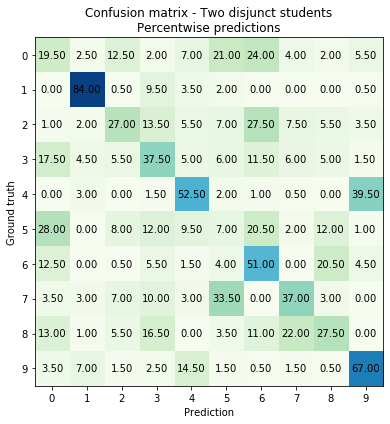

In [10]:
conf = normalize_conf_mat(conf[0])
plot_conf_mat(conf, ['0','1','2','3','4','5','6','7','8','9'], 'Prediction', 'Ground truth', "Confusion matrix - Two disjunct students\nPercentwise predictions")

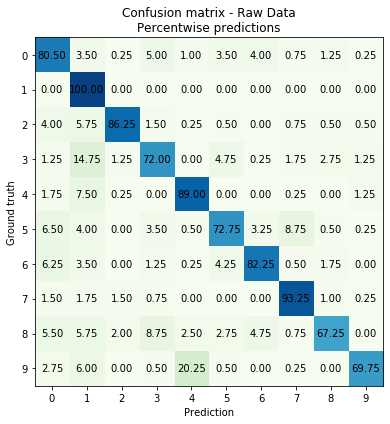

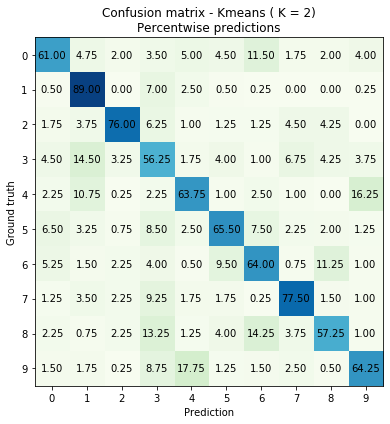

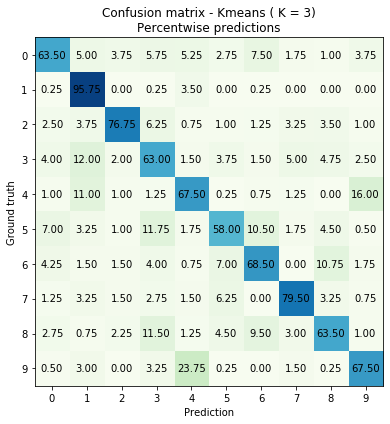

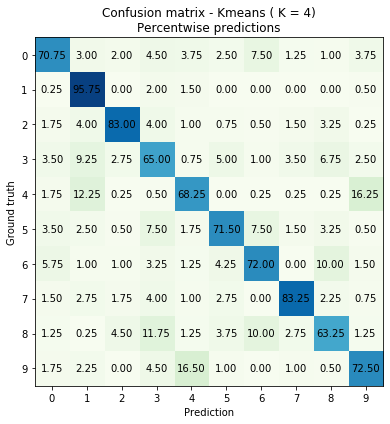

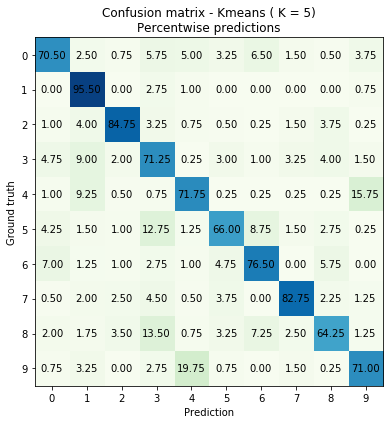

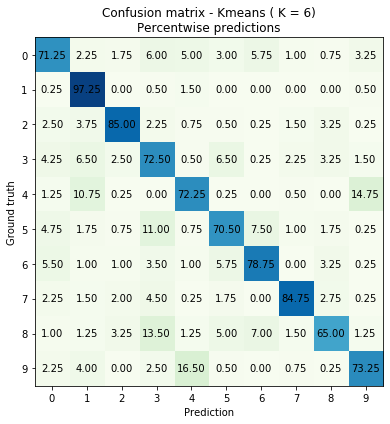

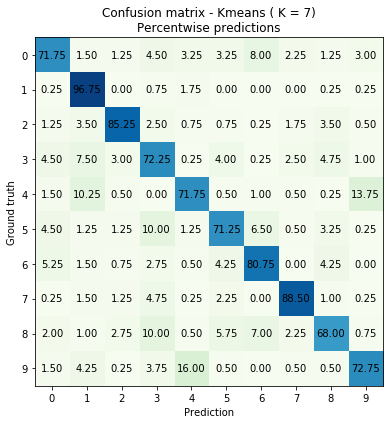

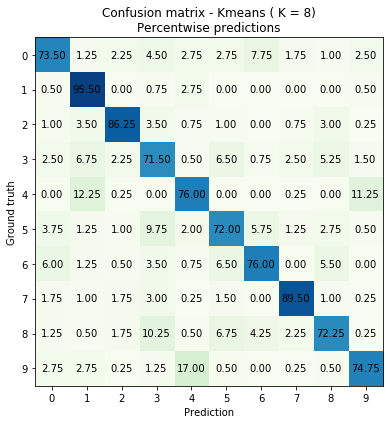

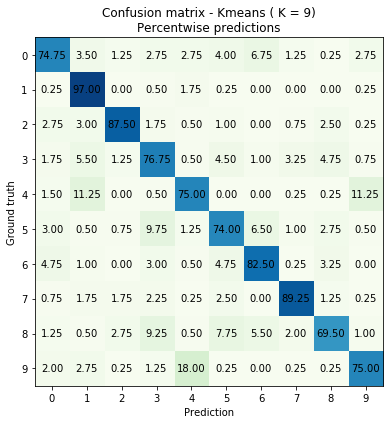

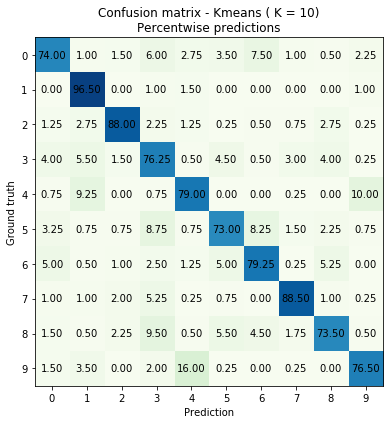

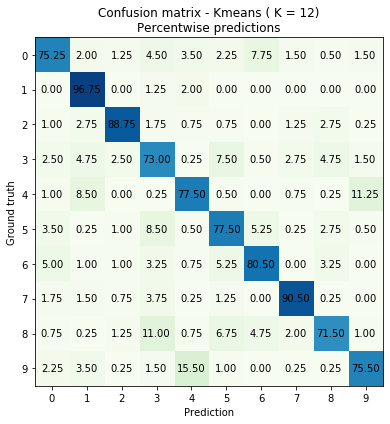

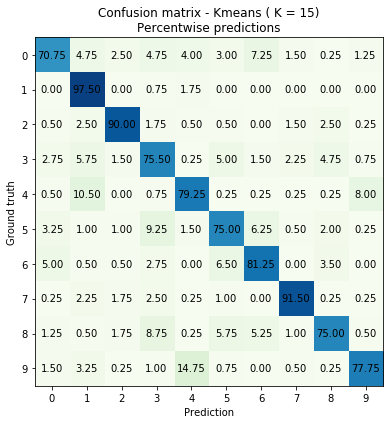

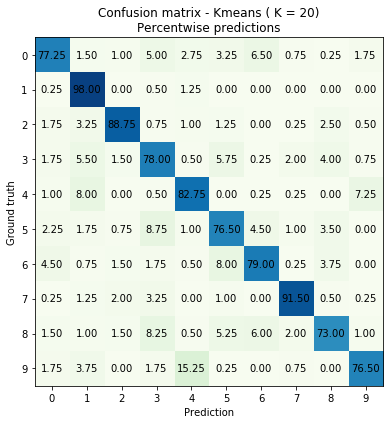

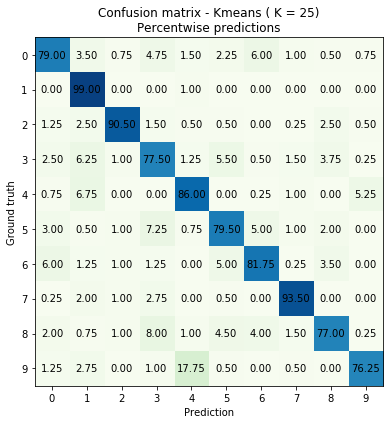

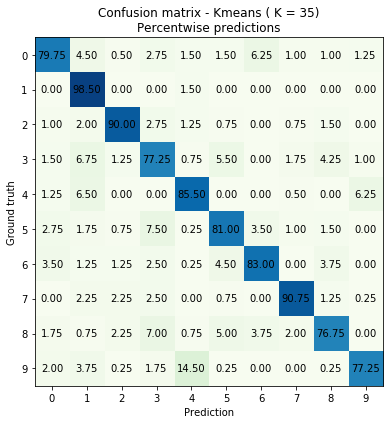

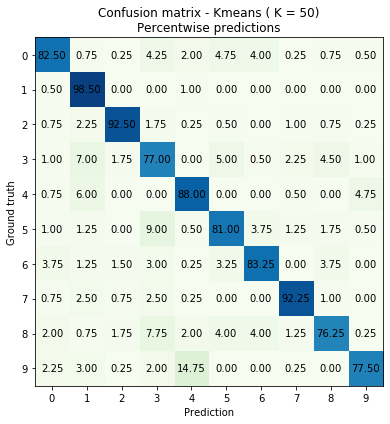

In [11]:
conf_mat_raw = normalize_conf_mat(conf_mat_raw)

tick_labels = ['0','1','2','3','4','5','6','7','8','9']


plot_conf_mat(conf_mat_raw, tick_labels, 'Prediction', 'Ground truth', "Confusion matrix - Raw Data\nPercentwise predictions")

for i, mat in enumerate(conf_mat_kmeans):
    mat = normalize_conf_mat(mat)
    title = "Confusion matrix - Kmeans ( K = " + str(k_clusters[i]) + ")\nPercentwise predictions"
    plot_conf_mat(mat, tick_labels, 'Prediction', 'Ground truth', title)

### 3.1.3 
Perform K-means clustering on each cipher individually for the training data from all the available datasets (disjunct). Represent the training data as a number of cluster centroids and compare performance, try multiple cluster sizes.

In [12]:
d_train, l_train, d_test, l_test = data_utils.split_data_disjunct(data, 0.8)
print(d_train.shape, '\t', d_test.shape)

k_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25, 35, 50]
k_nn = [1]

acc_kmeans = []
t_knn = []
t_kmeans = []
centroids_list = []
c_labels_list = []
conf_mat_kmeans = []

for k in k_clusters:
    print('k =', k, end='\t')
    # kmeans = KMeans(n_clusters=k, init='random', n_init=100, algorithm='full')
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, algorithm='full')

    centroids = np.ndarray((0,d_train.shape[1]))
    c_labels = np.ndarray((0,1))
    t_start = time.time()
    for cipher in range(10):

        kmeans.fit(d_train[l_train == cipher])

        centroids = np.append(centroids, kmeans.cluster_centers_, axis=0)
        l = [cipher]*k
        c_labels = np.append(c_labels, l)

    t_elapsed = time.time() - t_start
    t_kmeans.append(t_elapsed)
    print("t_kmeans =", "{:.3f}".format(t_elapsed), end='\t')

    centroids_list.append(centroids)
    c_labels_list.append(c_labels)

    a,_,_,mat,t = knn_algorithm.knnParamSearch(centroids, c_labels, d_test, l_test, k_nn, ['euclidean'])
    print('acc =', "{:.3f}".format(a[0]), '\tt_knn =', "{:.3f}".format(t[0]))
    acc_kmeans.append(a[0])
    t_knn.append(t[0])
    conf_mat_kmeans.append(mat)

t_total = np.add(t_knn, t_kmeans)

a_raw,_,_,conf_mat_raw,t_raw = knn_algorithm.knnParamSearch(d_train, l_train, d_test, l_test, k_nn, ['euclidean'])
print("No clustering:\t\t\t\tacc =", "{:.3f}".format(a_raw[0]), "\tt_knn =", "{:.3f}".format(t_raw[0]))

a_raw = a_raw*len(k_clusters)
t_raw = t_raw*len(k_clusters)

(52000, 529) 	 (14000, 529)
k = 2	t_kmeans = 28.468	acc = 0.450 	t_knn = 0.713
k = 3	t_kmeans = 40.552	acc = 0.479 	t_knn = 0.577
k = 4	t_kmeans = 42.437	acc = 0.498 	t_knn = 0.604
k = 5	t_kmeans = 48.651	acc = 0.500 	t_knn = 0.662
k = 6	t_kmeans = 49.822	acc = 0.530 	t_knn = 0.645
k = 7	t_kmeans = 57.442	acc = 0.533 	t_knn = 0.651
k = 8	t_kmeans = 56.786	acc = 0.539 	t_knn = 0.631
k = 9	t_kmeans = 63.753	acc = 0.538 	t_knn = 0.638
k = 10	t_kmeans = 56.711	acc = 0.552 	t_knn = 0.578
k = 12	t_kmeans = 61.762	acc = 0.558 	t_knn = 0.620
k = 15	t_kmeans = 67.204	acc = 0.583 	t_knn = 0.596
k = 20	t_kmeans = 58.111	acc = 0.599 	t_knn = 0.580
k = 25	t_kmeans = 62.163	acc = 0.619 	t_knn = 0.653
k = 35	t_kmeans = 86.027	acc = 0.630 	t_knn = 0.664
k = 50	t_kmeans = 81.352	acc = 0.641 	t_knn = 1.036
No clustering:				acc = 0.722 	t_knn = 48.680


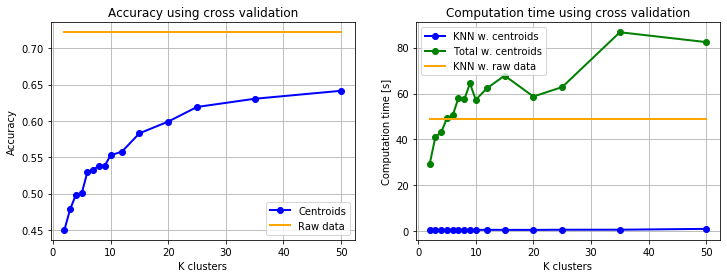

In [13]:
# Ploting graph of accuracy
fig, axs = plt.subplots(1, 2, figsize=(12,4))

t_total = np.add(t_knn, t_kmeans)

axs[0].plot(k_clusters, acc_kmeans, linewidth=2.0, marker=".", markersize=12, color='blue', label="Centroids")
axs[0].plot(k_clusters, a_raw, linewidth=2.0, marker=".", markersize=0, color='orange', label="Raw data")
axs[0].set(title="Accuracy using cross validation", xlabel="K clusters", ylabel="Accuracy")
axs[0].legend()
axs[0].grid(True)

axs[1].plot(k_clusters, t_knn, linewidth=2.0, marker=".", markersize=12, color='blue', label="KNN w. centroids")
axs[1].plot(k_clusters, t_total, linewidth=2.0, marker=".", markersize=12, color='green', label="Total w. centroids")
axs[1].plot(k_clusters, t_raw, linewidth=2.0, marker=".", markersize=0, color='orange', label="KNN w. raw data")
axs[1].set(title="Computation time using cross validation", xlabel="K clusters", ylabel="Computation time [s]")
axs[1].legend()
axs[1].grid(True)

plt.show()

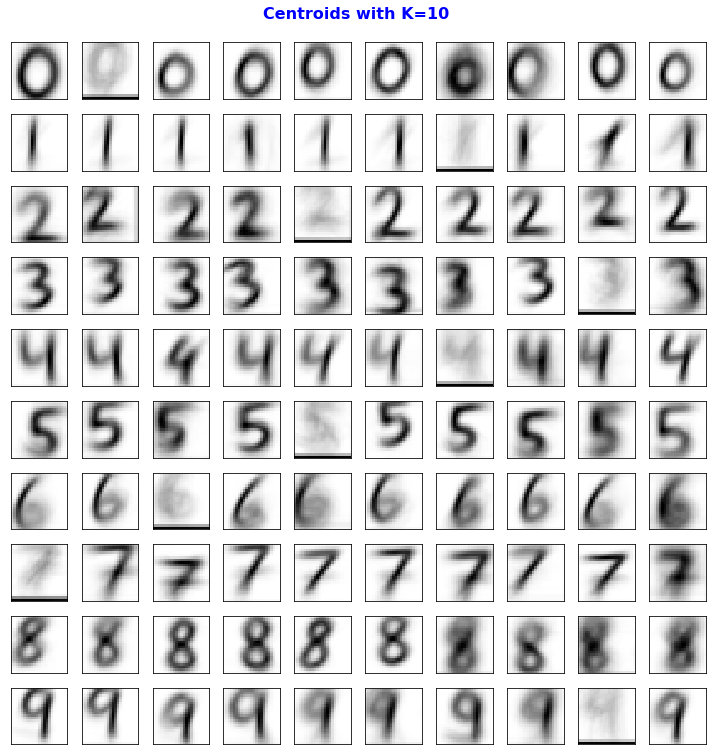

In [14]:
vis_dat = centroids_list[8]
vis_lab = c_labels_list[8]
fours_dat = vis_dat[vis_lab == 4]

subtitles = [' ']*10
vis_utils.visualize_generic(vis_dat, 10, 10, 'Centroids with K=10')
